# Tests vs FPs vs FNs

In this notebook we plot the resulting combinations of Tests, FPs and FNs for various combinations of lambdas.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
import glob
import json
from src import utils
sns.set_theme(context='paper', style='dark', font_scale=4)

In [3]:
name="tests_FP_FN"
golden = (1 + 5 ** 0.5) / 2
font_scale = 3.5
fig_height = 7
type_dict = {
    'days' : int,
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'score' : float,
    'se' : float,
    'sp' : float,
    'N' : int,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))
# final_df = pd.DataFrame()
data = []
for fl_id, fl in enumerate(files):
    with open(fl,"r") as f:
        # df = pd.DataFrame.from_records(json.load(f), index=[fl_id])
        df = pd.DataFrame.from_records([json.load(f)])
        data.append(df)

input_df = pd.concat(data)

In [6]:
input_df

,lambda_1,lambda_2,se,sp,r,k,group_size,method,score,num_of_tests,false_negatives,false_positives,num_of_infected,seed,N,days
0,0.0,0.0,0.7,0.95,2.5,0.2,1.0,individual,3.0,3,0,0,0,655,3,7
0,0.4,0.3,0.7,0.95,2.5,0.2,4.0,negbin,3.8999999999999995,12,0,1,0,454,32,7
0,0.9,0.1,0.7,0.95,2.5,0.2,1.0,negbin,0.19999999999999993,3,0,2,1,686,3,7
0,0.6,0.0,0.7,0.95,2.5,0.2,2.0,negbin,0.4,1,0,0,0,614,2,7
0,0.7,0.1,0.7,0.95,2.5,0.2,4.625,negbin,2.4000000000000004,12,0,0,0,971,37,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.3,0.7,0.7,0.95,2.5,0.2,2.037037037037037,dorfman,0.0,35,0,0,0,154,55,7
0,0.2,0.4,0.7,0.95,2.5,0.2,1.0,individual,31.0,74,1,3,3,822,74,7
0,0.1,0.9,0.7,0.95,2.5,0.2,2.0232558139534884,negbin,0.0,55,0,0,0,161,87,7
0,0.1,0.1,0.7,0.95,2.5,0.2,4.333333333333333,negbin,5.6000000000000005,7,0,0,0,697,13,7


In [10]:
total_df = input_df.astype(type_dict) # Fix types
total_df = total_df.rename(columns={"method": "Method", "score": "Score"}) # Rename columns
total_df = total_df.replace({'dorfman': 'Dorfman', 'individual': 'Individual', 'negbin': 'Neg.Bin.'}) # Rename methods
total_df = total_df[total_df['Method']!='Individual']

In [11]:
total_df['false_negatives'] /= total_df['N']
total_df['false_positives'] /= total_df['N']
total_df['num_of_tests'] /= total_df['N']

In [21]:
neg_bin_df = total_df[total_df['Method']=='Neg.Bin.']

utils.latexify(fig_width=fig_height*golden, fig_height=fig_height, font_scale=font_scale)
g = sns.relplot(x="num_of_tests", y="false_negatives", aspect=golden, height=fig_height, kind="line", data=neg_bin_df)
g.tight_layout()
g.savefig('figures/{name}_temp.pdf'.format(name=name))

RuntimeError: latex was not able to process the following string:
b'num_of_tests'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/stratis/.cache/matplotlib/tex.cache/5b10941f6083db049fd92fb9c6c6e597.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/was/gensymb.sty)
(/usr/share/texlive/texmf-dist/tex/latex/tools/bm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./5b10941f6083db049fd92fb9c6c6e597.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily num_
                    of_tests}
No pages of output.
Transcript written on 5b10941f6083db049fd92fb9c6c6e597.log.




In [151]:
l1_values = sorted(final_df['lambda_1'].unique())
l2_values = sorted(final_df['lambda_2'].unique())
methods = ['Dorfman', 'Neg.Bin.']

DFs = {}
for meth in methods:
    data = []
    for l1 in l1_values:
        for l2 in l2_values:
            temp_df = final_df[(final_df['lambda_1']==l1) & (final_df['lambda_2']==l2) & (final_df['Method']==meth)]
            # false_negatives = temp_df['false_negatives'].div(temp_df['N'])
            # false_positives = temp_df['false_positives'].div(temp_df['N'])
            # num_of_tests = temp_df['num_of_tests'].div(temp_df['N'])
            false_negatives = temp_df['false_negatives'].div(temp_df['N']).mean()
            false_positives = temp_df['false_positives'].div(temp_df['N']).mean()
            num_of_tests = temp_df['num_of_tests'].div(temp_df['N']).mean()
            # false_negatives = temp_df['false_negatives'].mean()
            # false_positives = temp_df['false_positives'].mean()
            # num_of_tests = temp_df['num_of_tests'].mean()
            # temp_df = pd.DataFrame.from_dict({'\\# of False Negatives' : [false_negatives], '\\# of False Positives' : [false_positives], '\\# of Tests' : num_of_tests})
            temp_df = pd.DataFrame.from_dict({'FNs' : [false_negatives], 'FPs' : [false_positives], 'Tests' : [num_of_tests]})
            # temp_df = pd.DataFrame.from_dict({'FNs' : false_negatives, 'FPs' : false_positives, 'Tests' : num_of_tests})
            data.append(temp_df)
    DFs[meth] = pd.concat(data)
    DFs[meth] = DFs[meth].dropna()

In [139]:
lines = {}
for meth in methods:
    FNs = np.array(DFs[meth]['FNs'])
    FPs = np.array(DFs[meth]['FPs'])
    tests = np.array(DFs[meth]['Tests'])
    fit = np.polyfit(FNs, FPs, 3)
    p = np.poly1d(fit)
    
    x_vals = np.linspace(min(FNs),max(FNs),1000)
    y_vals = p(x_vals)

    fit = np.polyfit(FNs, tests, 3)
    p = np.poly1d(fit)
    z_vals = p(x_vals)

    lines[meth] = (x_vals, y_vals, z_vals)
    # data = []
    # for ind, x_val in enumerate(FNs):
    #     temp_df = pd.DataFrame.from_dict({'FNs' : [x_val], 'FPs' : [p(x_val)], 'Tests' : [tests[ind]]})
    #     data.append(temp_df)
        # data.append((my_x, p(my_x), tests[ind]))

    # final_df = pd.concat(data)

In [149]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
utils.latexify(fig_width=10, font_scale=3)

x_1, y_1, z_1 = lines['Dorfman']
x_2, y_2, z_2 = lines['Neg.Bin.']

points_1 = np.array([x_1, y_1]).T.reshape(-1, 1, 2)
segments_1 = np.concatenate([points_1[:-1], points_1[1:]], axis=1)
print=True
step = 2
temp = []
for ind in range(0, len(segments_1), step):
    temp += segments_1[ind:ind+step]

segments_1 = temp
# segments_1 = [seg for ind,seg in enumerate(segments_1) if ind % 3==0]

points_2 = np.array([x_2, y_2]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(min(z_1.min(), z_2.min()), max(z_1.max(), z_2.max()))
lc_1 = LineCollection(segments_1, cmap='flare', norm=norm)
# Set the values used for colormapping
lc_1.set_array(z_1)
lc_1.set_linewidth(2)
line_1 = ax.add_collection(lc_1)
# fig.colorbar(line_1, ax=ax)

lc_2 = LineCollection(segments_2, cmap='flare', norm=norm)
# Set the values used for colormapping
lc_2.set_array(z_2)
lc_2.set_linewidth(2)
line_2 = ax.add_collection(lc_2)
fig.colorbar(line_2, ax=ax)

ax.set_xlim(min(x_1.min(),x_2.min()), max(x_1.max(), x_2.max()))
ax.set_ylim(min(y_1.min(),y_2.min()), max(y_1.max(), y_2.max()))
# axs[0].set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.savefig('figures/{name}.pdf'.format(name=name))

ValueError: operands could not be broadcast together with shapes (0,) (2,2,2) 

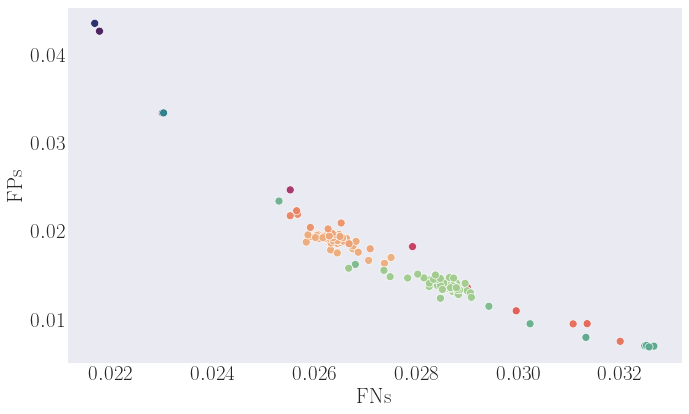

In [167]:
utils.latexify(fig_width=10, font_scale=3)
# N_values = sorted(final_df['N'].unique())
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html
ax1 = sns.scatterplot(data=DFs['Dorfman'], x="FNs", y="FPs", hue="Tests", legend=False, palette='flare')
ax2 = sns.scatterplot(data=DFs['Neg.Bin.'], x="FNs", y="FPs", hue="Tests", legend=False, palette='crest')
# ax = sns.heatmap(data=final_df, cmap='flare', linewidths=0.05)
# ax = sns.lineplot(data=final_df, x="N", y="Score", hue="Method", palette='deep', style="Method", markers=marker_dict,
                    # dashes=None, legend=None, ci=95)
# ax.set_xticks(N_values)
# ax.set_xticklabels(N_values)
# ax.legend(['Individual', 'Dorfman', 'Neg.Bin.'])

plt.tight_layout()
plt.savefig('figures/{name}.pdf'.format(name=name))